In [27]:
#Vivian （ry973) Yin's Homework 2 code
#importing modules
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.linalg import inv, norm


0.33249647143278727 0.6642004699904484 0.2335793404086537


Minimize $$\frac{1}{N} \sum_{i=1}^{N}(y_i -f(x_i,c1,c2,c3))^2$$ 

Where: $$f(x,c_1,c_2,c_3) = c_1+c_2e^{c_3x}$$

[0.33214856 0.79237209 0.43903792]


Text(0, 0.5, 'y')

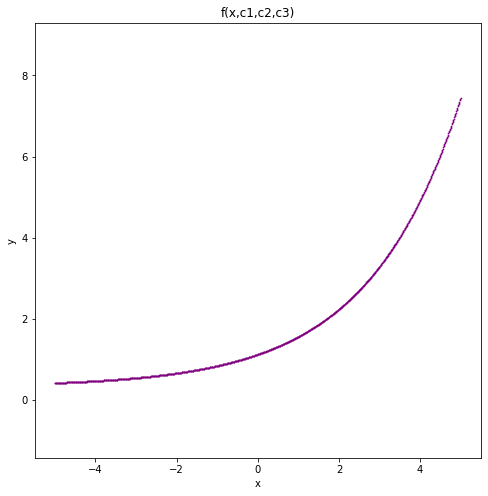

In [127]:
c = np.random.rand(3)
#N = 100 #set an number for N, N can be other numbers
#alpha = .1

#noise = [0.1,0.04]
c = np.random.rand(3)
c1 = c[0]
c2 = c[1]
c3 = c[2]
#coef = [c1,c2,c3]
x=np.linspace(-5,5,1000)
print (c)
def func (x,c1,c2,c3): #defining the function f
    f=  c1 + c2*math.e**(c3*x) 
    return f


y = func(x,*c) #from recitation

plt.figure (figsize = (8,8))
plt.axis ('equal')
#find a color for the plot
plt.scatter (x,y, s=2, color = 'purple', marker = "." )#s is the size, c is the colour, marker is the shape of the marker
plt.title ("f(x,c1,c2,c3)")
plt.xlabel ("x")
plt.ylabel ("y")

Let $c = (a, b)^\top$ be the vector of parameters and recall Gauss Newton:
$$ c_{n+1} = c_n + \left( Df(c_n)^\top Df(c_n) \right)^{-1}Df(c_n)^\top \left( y - f(c_n) \right) $$

With $N$ number of observations $y$, what is the correct size of the $Df(c_n)$ matrix? Then, what is the correct size of this matrix $\left( Df(c_n)^\top Df(c_n) \right)^{-1}$?  

Let N = 100 as before, program Gauss-Newton method to fit the true observations (the ones we found in the line above).

What are the "ingredients" we need for Gauss-Newton?
   - Jacobian matrix Df(c_n)
   - Initial point, in our case is a point $c_0 = (a_0, b_0)^\top$
   - Some points x (of size N) and some observations y (of size N as well)


Number of iterations done 15


C:\Users\ry973\AppData\Local\Temp/ipykernel_28480/1205303421.py:5: RuntimeWarning: overflow encountered in exp
  Df[:,1] = np.exp (c[2]*x)  # partial with respect to c2
C:\Users\ry973\AppData\Local\Temp/ipykernel_28480/1205303421.py:6: RuntimeWarning: overflow encountered in exp
  Df[:,2] = c[1]*np.exp(c[2]*x) # partial with respect to c3
C:\Users\ry973\AppData\Local\Temp/ipykernel_28480/631059567.py:14: RuntimeWarning: overflow encountered in power
  f=  c1 + c2*math.e**(c3*x)
C:\Users\ry973\AppData\Local\Temp/ipykernel_28480/1205303421.py:18: RuntimeWarning: invalid value encountered in matmul
  while (norm (np.matmul(Df.T,res))>tol and i<maxIter):
C:\Users\ry973\AppData\Local\Temp/ipykernel_28480/1205303421.py:20: RuntimeWarning: invalid value encountered in matmul
  c = c+np.matmul(inv(np.matmul(Df.T,Df)), np.matmul(Df.T,np.subtract(y,f)))


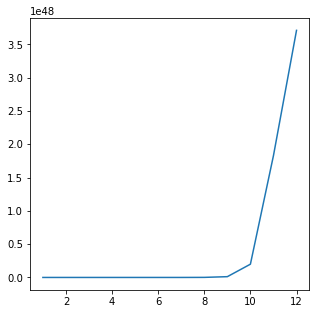

In [144]:
#this part is mainly taken from the recitation
def computeDf(c,x):
    Df = np.zeros ((len(x),len(c))) # initializing a matrix full of zeros 
    Df[:,0] = 1 # partial with respect to c1 
    Df[:,1] = np.exp (c[2]*x)  # partial with respect to c2
    Df[:,2] = c[1]*np.exp(c[2]*x) # partial with respect to c3
    return Df
    
def GaussNewton(c0,x,y): #c0 is the starting point, 
  maxIter = 1000 #max 1000 iterations
  tol = 1e-2 #
  Df = computeDf(c0,x) #Jacobian at c0
  f = func(x, *c0.T)
  res = y-f #residual from starting point
  i=1
  c=c0
  res_norms = []
  while (norm (np.matmul(Df.T,res))>tol and i<maxIter):
  #we want to iterate
    c = c+np.matmul(inv(np.matmul(Df.T,Df)), np.matmul(Df.T,np.subtract(y,f)))
    Df = computeDf(c,x)
    f = func (x, *c.T)
    res = y-f
    i+= 1
    res_norms += [norm(res)] 
  return c, i, res, res_norms

#c0 = np.array([0.005,0.849814,0.231]) #random number to test
#c,i, res, res_norms = GaussNewton(c0,x,y)
#plt.figure ( figsize = (5,5))
#plt.plot (range(1,i), res_norms) 
#plt.figure ( figsize = (5,5))
#plt.plot (range(1,i), res_norms) 
print("\nNumber of iterations done", i)

In [ ]:
#adding N and noise
def Noise(N,noise,c,d)：
    x